In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000036966"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000036966
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,FIRST HORIZON NATIONAL CORP
Ticker,FHN


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,44.0,1.308568e+01,4.159994e+00,8.640000e+00,9.250000e+00,1.179500e+01,1.675500e+01,2.006000e+01
interest income,63.0,3.058902e+08,1.406092e+08,1.735840e+08,1.967875e+08,2.309910e+08,3.971420e+08,6.125980e+08
net income,67.0,3.466269e+07,8.075141e+07,-2.486250e+08,7.920000e+06,4.974900e+07,7.411800e+07,2.747160e+08
net interest income,67.0,2.041057e+08,4.237304e+07,1.400780e+08,1.720015e+08,1.909010e+08,2.329325e+08,3.109320e+08
provision for loan losses,66.0,4.911683e+07,8.486429e+07,-2.000000e+06,5.000000e+06,1.270050e+07,4.251400e+07,3.400000e+08
total revenue,65.0,8.738582e+09,6.729820e+10,2.219700e+08,3.170410e+08,3.537670e+08,4.384570e+08,5.429660e+11


# Plots

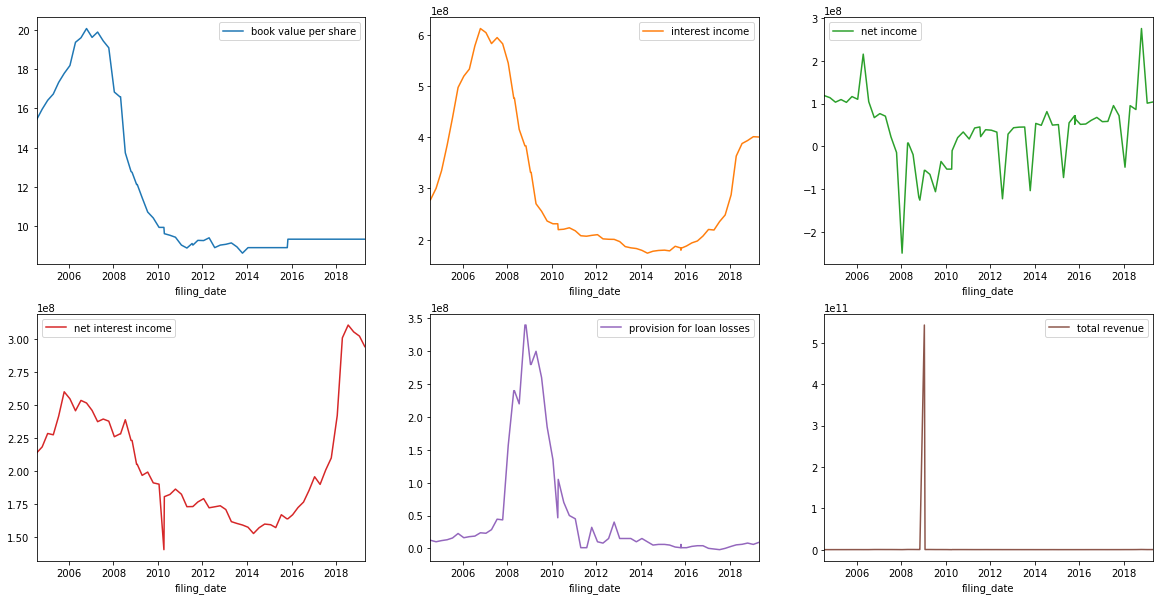

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000036966 book value per share        2014Q1 to 2015Q2: 6 periods    missing   
           book value per share       2015Q4 to 2019Q1: 14 periods    missing   
           net income                                       2011Q2  duplicate   
           net interest income                              2009Q4  duplicate   
           provision for loan losses                        2009Q4  duplicate   
           total revenue                                    2008Q4  duplicate   
           total revenue                                    2009Q4  duplicate   
           total revenue                                    2018Q1    missing   

                                               message  
cik        item                                         
0000036966 book value per share         Missing period  
           book value per share         Missing period  
           net income                 Duplicate period  
           net interest income        Duplicate period  
           provision for loan losses  Duplicate period  
           total revenue              Duplicate period  
           total revenue              Duplicate period  
           total revenue                Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()